<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Regresión </H1>

<H3> INF-396 Introducción a la Ciencia de Datos </H3>
<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

Temas:

    - Regresión Lineal
    - Regresión Polinomial
    - Regresión Logística
<hr style="height:2px;border:none"/>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

In [67]:
# Funciones para generar datos sintéticos para probar la regresión
np.random.seed(0)
def true_f(x):
    return 0.1 * (x-2) ** 3 + x ** 2 - 8.0 * x - 1.0

def generate(n_samples):
    X = np.random.rand(n_samples,) * 20.0 - 10.0
    y = true_f(X) + 5 * np.random.randn(n_samples)
    
    return X.reshape(n_samples, 1), y


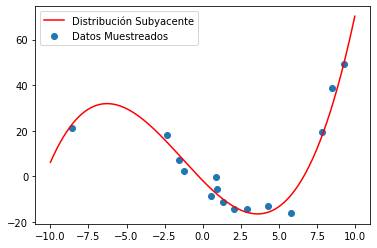

In [68]:

X_train, y_train = generate(15)
xs = np.linspace(-10, 10, num=1000)
plt.plot(xs, true_f(xs), c="r", label="Distribución Subyacente")
plt.scatter(X_train, y_train, label="Datos Muestreados")
plt.legend()
plt.show()

X_test, y_test = generate(50)


In [75]:
# ---------------
# En esta sección implementé las funciones necesarias
# para la regresión polinomial: 
# features: función con entrada X y que genera una nueva representación X_features.
# con features de un polinomio de grado d calculadas de X.
# learn: Funcion que toma como entrada X e y y calcula los pesos W, utilizando las ecuaciones normales.
# model: Funcion que toma una entrada X y pesos W y calcula la predicción del modelo.
# error: Función que toma como entrada la prediccion y_hat e y y calcula el error cuadrático.
# --------------

def features(X, d):
    poly = PolynomialFeatures(d)
    X_features = poly.fit_transform(X)
    return X_features

def learn(X_features, y_train):
    W = np.linalg.inv(X_features.T.dot(X_features)).dot(X_features.T).dot(y_train)
    return W

def model(X, W, poly):
    # aqui su codigo
    X = poly.fit_transform(X)
    y = X.dot(W)
    return y

def error(y_hat, y):
    #aqui su codigo
    error = np.mean(np.power((y_hat-y),2))
    return error

In [76]:
def train(X_train,y_train,d):
    X_features = features(X_train, d)
    W = learn(X_features, y_train)
    return W
for d in [3,5,10,15]:
    print("Para d = {}:".format(d))
    poly = PolynomialFeatures(d)

    W = train(X_train,y_train,d)


    # probar modelo en training set
    y_hat = model(X_train, W, poly)
    error_training = error(y_hat, y_train)
    print("    Error en los datos de entrenamiento: {}".format(error_training))


    # probar modelo en test set

    y_hat_test = model(X_test,W,poly)
    error_test = error(y_hat_test, y_test)
    print("    Error en los datos de testing: {}".format(error_test))

Para d = 3:
    Error en los datos de entrenamiento: 14.724965526473653
    Error en los datos de testing: 26.305594297585923
Para d = 5:
    Error en los datos de entrenamiento: 14.348601074938326
    Error en los datos de testing: 40.271815837191
Para d = 10:
    Error en los datos de entrenamiento: 3.5645171309420025
    Error en los datos de testing: 44789988.246740624
Para d = 15:
    Error en los datos de entrenamiento: 468208.4889943449
    Error en los datos de testing: 14929885060681.033


Para d = 3


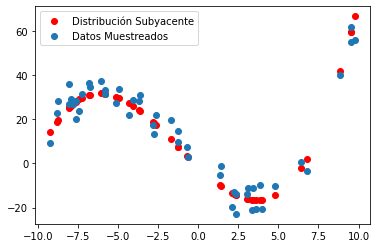

In [77]:
print("Para d = 3")
poly = PolynomialFeatures(3)
W = train(X_train,y_train,3)
y_hat = model(X_train, W, poly)
error_training = error(y_hat, y_train)
y_hat_test = model(X_test,W,poly)
error_test = error(y_hat_test, y_test)


plt.scatter(X_test, y_hat_test, c="r", label="Distribución Subyacente")
plt.scatter(X_test, y_test, label="Datos Muestreados")
plt.legend()
plt.show()

### Conclusiones
- El mejor resultado se obtiene con d = 3. Aquí se encuentra el equilibrio generalización-complejidad del modelo. Esto era esperable, ya que la distribución original se creó a partir de un polinomio de grado 3.
- Para d = 10 y d = 15, el modelo es demasiado complejo y sufre de overfitting severo.

# Tarea 3-2: Regresión Logística

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [8]:
# ---------------
# En esta sección implementé las funciones necesarias
# para la regresión logística: cost: Función de costo,
# gradient: Gradiente de la función de costo respecto a los
# parámetros, gradient_descent: Gradiente descendiente
# --------------

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s


def cost(X, y, theta):
    m = X.shape[0]
    A = sigmoid(X.dot(theta.T))
    cost =  (-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return cost

def gradient(X, y, theta):
    m = X.shape[0]
    A = sigmoid(X.dot(theta.T))
    dtheta = (1/m)*np.dot(X.T,(A-y)).T
    return dtheta

def gradient_descent_step(X, y, theta, alpha=0.01):
    new_theta = theta - alpha*gradient(X, y, theta)
    return new_theta

def gradient_descent(X, y, theta, iterations=100, alpha=0.01):
    # retorna una lista con la historia de costos y thetas en
    # cada iteracion
    thetas, costs = [],[]
    for i in range(iterations):
        theta = gradient_descent_step(X, y, theta, alpha=0.01)
        costo = cost(X, y, theta)
        thetas.append(theta)
        costs.append(costo)
        
    return thetas, costs
    


In [9]:
import pandas as pd
# leer datos
df = pd.read_csv('tarea2_data.txt',header=None)
df.columns = ["atributo1", "atributo2", "target"]
df["b"] = 1
X_train, y_train = df[["b","atributo1","atributo2"]], df["target"].values.reshape(-1,1)


#entrenar modelo
w = np.zeros((1,X_train.shape[1]))
thetas, costs = gradient_descent(X_train, y_train, w)

<ipython-input-8-24631d1158a9>:16: RuntimeWarning: divide by zero encountered in log
  cost =  (-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
<ipython-input-8-24631d1158a9>:9: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


#### El código produce un error debido a que los datos no están normalizados. Normalizar los datos es muy importante para la regresión logística. Esto es debido a que la función sigmoid está recibiendo números muy grandes (producto de la diferencia de proporciones entre atributos) que transforma a $1_s$ y a $0_s$. Luego, la función de costo trata de calcular $log(0)$.

In [10]:

# MinMax scaler
def normalize(X):
    new_X= (X-X.min())/(X.max()-X.min())
    return new_X.fillna(1)

In [11]:

X_train_norm = normalize(X_train)
#entrenar modelo

#inicializar parametros
w = np.zeros((X_train_norm.shape[1],1)).T
thetas, costs = gradient_descent(X_train_norm, y_train, w)

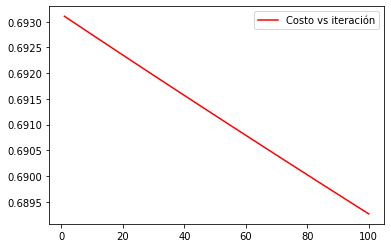

In [12]:
plt.plot(range(1,101), costs, c="r", label="Costo vs iteración")

plt.legend()
plt.show()



#### Se nota una disminución consistente en el costo

In [13]:
clf = LogisticRegression().fit(X_train_norm,y_train.squeeze())
costo = cost(X_train_norm,y_train,clf.coef_)
print(costo)

0    0.6735
dtype: float64


#### El método implementado por sklearn llega a un mejor resultado. Esto puede deberse a que ocupe otro método que no es gradiente descendente o a que los parámetros estén inicializados de forma diferente. De cualquier forma, la diferencia no es sustantiva.